In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
df= pd.read_csv('/content/drive/MyDrive/archive (4)/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#we're going to drop the customerID column since it can not be used in creating a model
df.drop('customerID',axis= 'columns', inplace= True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Data exploration

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

from the above data we can see that the total charges column are objects.

In [5]:
df.TotalCharges.values  #the output indicates the values are strings so we need to convert them to numbers

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges) #we just realized the column has blank rows .

ValueError: Unable to parse string " " at position 488

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull() #we use the coerce function so that we can do conversion of the columns and ignore the blank rows in the column.

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape #to view the total number of rows that are blank

(11, 20)

In [9]:
for x in df.index:
  if df.loc[x,'TotalCharges']==" ":
    df.drop(x,inplace=True)
df.shape

(7032, 20)

In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [12]:
df.TotalCharges.dtypes

dtype('float64')

**Visualization**

This involve relating the various colums with the other to see how a given set of data affects customer chur within the company.

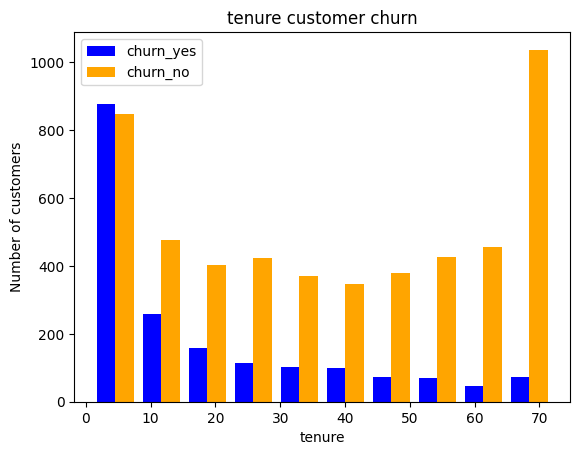

In [13]:
#tenure columns
tenurechurn_Yes=df[df.Churn=='Yes'].tenure
tenurechurn_No= df[df.Churn=='No'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('tenure customer churn')
plt.hist([tenurechurn_Yes,tenurechurn_No],color=['blue','orange'],label=['churn_yes','churn_no'])
plt.legend()

the histogram indicates that customers who have stayed with the company for longer period are less likely to churn the company.Tenure means the average time measured in years since customers initiated their contracts, and from the results, cutomers with a longer tenure are retained within the company.

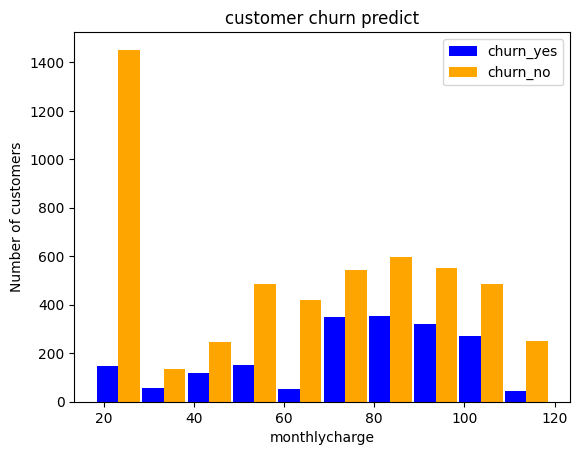

In [14]:
#monthly charges visualization
Mc_churn_Yes=df[df.Churn=='Yes'].MonthlyCharges
Mc_churn_No= df[df.Churn=='No'].MonthlyCharges

plt.xlabel('monthlycharge')
plt.ylabel('Number of customers')
plt.title('customer churn predict')
plt.hist([Mc_churn_Yes,Mc_churn_No],rwidth=0.95, color=['blue','orange'],label=['churn_yes','churn_no'])
plt.legend()

In [15]:
#checking for unique values inthe columns whose dtypes are objects
def unique_values_col(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}:{df[column].unique()}')

In [16]:
unique_values_col(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [17]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace= True) #replacing all the rows that have 'no phone service'and those with 'no internet' with a No

In [18]:
unique_values_col(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [19]:
columns_to_convert = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                      'PaperlessBilling','Churn']

df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
#converting the columns with 'yes'and 'No' to binary digits (0,1)

In [20]:
for col in df:
  print(f'{col}:{df[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [21]:
df['gender'].replace({'Female':1,'Male':0},inplace=True) # converting the gender column into 1 and 0

In [22]:
df['gender'].unique()

array([1, 0])

In [23]:
subdf= pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'],dtype=int)
subdf.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
subdf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [25]:
subdf.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

#scaling the data

In [26]:
# all other columns are in the range of 0-1 while the tenure ,monthlycharges and totalcharges are not i the 0-1 range so we need to rescale it.
from sklearn.preprocessing import MinMaxScaler
scaler=  MinMaxScaler()

In [27]:
scalings = ['tenure','MonthlyCharges','TotalCharges']
subdf[scalings]= scaler.fit_transform(subdf[scalings])

In [28]:
subdf['TotalCharges']

0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7032, dtype: float64

#Train_Split_Test

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [52]:
Kf=KFold(n_splits=10)
Kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [53]:
X= subdf.drop('Churn',axis='columns')
y= subdf['Churn']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=5)

In [55]:
X_train.shape

(5625, 26)

In [56]:
X_test.shape

(1407, 26)

Model Valuation

In [57]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [58]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

0.7945984363894811

In [59]:
get_score(SVC(gamma='auto'),X_train,X_test,y_train,y_test)

0.7853589196872779

In [60]:
get_score(RandomForestClassifier(n_estimators=40),X_train,X_test,y_train,y_test)

0.7711442786069652

from the machine learning models above, logisticRgression model seems to train better than the rest though they are not far apart.we carry model evaluation through the help of KFold ,where we divide the data into folds and this will help in the shuffling of the folds during training for uniformity of data.The resulting scores will be avaraged to get a fair model score

In [61]:
model=keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,),activation='relu'),
    #keras.layers.Dense(20,activation='LeakyReLU'),
    #keras.layers.Dense(15,activation='relu'),
    #keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 3ms/step - loss: 0.5033 - accuracy: 0.7403
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4348 - accuracy: 0.7963
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4252 - accuracy: 0.8009
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4204 - accuracy: 0.8014
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4174 - accuracy: 0.8025
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8034
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.8050
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4138 - accuracy: 0.8057
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4128 - accuracy: 0.8094
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4117 - accura

This will train the model for 100 epochs using the training data. After training, we then can evaluate the model on test data to assess its performance.

The 'loss' value decreases from 0.5331 in epoch 1 to 0.3809 in epoch 100.The 'accuracy' value increases from 0.7303 in epoch 1 to 0.8176 in epoch 100.



In [62]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 6ms/step - loss: 0.4420 - accuracy: 0.7882


[0.4419819414615631, 0.7882018685340881]

The evaluation results indicate that the model achieved a loss of approximately 0.4572 and an accuracy of approximately 78.11% on the test dataset.



In [65]:
y_predicted= model.predict(X_test)
y_predicted[:10]

44/44 [==============================] - 0s 2ms/step


array([[0.09202728],
       [0.43880022],
       [0.01025403],
       [0.7740486 ],
       [0.48119628],
       [0.7874405 ],
       [0.07746378],
       [0.56950396],
       [0.3151936 ],
       [0.15120123]], dtype=float32)

In [66]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [67]:
#converting the y_predicted values to 1 or 0
y_pred=[]
for element in y_predicted:
  if element >0.5:
    y_pred.append(1)
  else:
      y_pred.append(0)

In [68]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [69]:
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       999
           1       0.67      0.53      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



The model correctly predicts the class label for approximately 78% of all instances in the test dataset.

Text(95.72222222222221, 0.5, 'True Values')

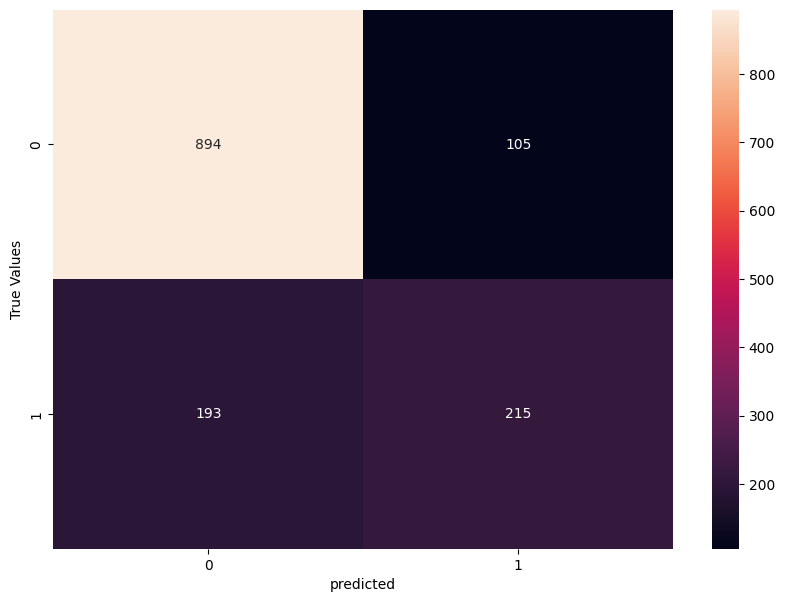

In [71]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels= y_test,predictions= y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('True Values')

True values (actual labels) are shown on the y-axis, and the predicted values (model predictions) are shown on the x-axis.The cells of the heatmap display the counts of true positives, false positives, true negatives, and false negatives.

From the results, (894+215)=1109 are classified as true and (193+105)=298 are classified as false thus the accuracy of the model is slightlyabove average performance.

In [72]:
#accuracy= total number of true predictions/total number of predictions
round((894+215)/(877+222+186+122),2)

0.78

In [73]:
#precision for churned members 1 = true predictions of 1 /total predictions of 1
round(222/(222+122),2)


0.65

In [74]:
#precision for non-churned members 0 = true predictions of 0/total predictions of 0
round(877/(877+186),2)

0.83

recall

In [75]:
#recall is the total correct 0 /total 0
round(877/(877+122),2)

0.88

In [76]:
round(222/(186+222),2)

0.54

Using CNN to predict Customer churn

Customer churn is the percentage of customers that stopped using a company's product or service during the past one month.In today's competitive market, customer churn poses a significant challenge for businesses across various industries. Identifying customers who are at risk of churn is crucial for businesses to proactively retain them and maintain a sustainable customer base. Traditional methods of predicting churn often rely on static features and may not capture the complex patterns inherent in customer behavior. Therefore, there is a need for more sophisticated techniques to accurately predict churn and implement targeted retention strategies.

We chose Convolutional Neural Networks (CNN) because they are specialized types of neural networks and can be applied to many kinds of data with different dimensions. The main advantage of CNN compared to its predecessors is that it automatically detects the important features without any expert support. This benefit makes CNN more attractive to apply a churn prediction model with many data features.

Conclusion

By leveraging the capabilities of CNNs for automatic feature extraction and pattern recognition, businesses can develop more accurate and robust churn prediction models, enabling them to proactively identify and retain customers at risk of churn.

By:

PHIONAH ADHIAMBO

ESTHER JUDITH OTIENO